# Case Study 4.1 - Movies

# ADVANCED PYTHON

As this is an advanced version, we don't include a lot of code here. If you get stuck on a particular part, feel free to also use the beginner version in `beginnner_python.ipynb` to help you out.

# Identification Information

In [1]:
# YOUR NAME              = Ariel Arturo Goubiah Gamboa Vazquez
# YOUR MITX PRO USERNAME = goubiah
# YOUR MITX PRO E-MAIL   = goubiah@gmail.com

# Setup

Run these cells to install all the packages you need to complete the remainder of the case study. This may take a few minutes, so please be patient.

In [2]:
!pip install surprise

    100% |████████████████████████████████| 3.3MB 472kB/s ta 0:00:011
    100% |████████████████████████████████| 31.2MB 59kB/s eta 0:00:011  2% |▊                               | 686kB 10.9MB/s eta 0:00:03    23% |███████▍                        | 7.2MB 8.5MB/s eta 0:00:03    30% |█████████▊                      | 9.5MB 24.2MB/s eta 0:00:01
  Running setup.py bdist_wheel for scikit-surprise ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/ec/c0/55/3a28eab06b53c220015063ebbdb81213cd3dcbb72c088251ec
Successfully built scikit-surprise
  Found existing installation: scipy 0.19.1
    Uninstalling scipy-0.19.1:
      Successfully uninstalled scipy-0.19.1


Now, you must press **Kernel > Restart.** This allows the installation to take effect. Once you see the blue **Connected/Kernel ready** button in the top right, you are good to go.

# Import

In [1]:
import pandas as pd
import matplotlib
from surprise import Dataset, SVD, NormalPredictor, BaselineOnly, KNNBasic, NMF
from surprise.model_selection import cross_validate, KFold

# Data

Use the [`**Dataset.load_builtin**`](http://surprise.readthedocs.io/en/stable/dataset.html#surprise.dataset.Dataset.load_builtin) function to load the data.

In [2]:
data = Dataset.load_builtin('ml-100k')

Dataset ml-100k could not be found. Do you want to download it? [Y/n] y
Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /home/nbuser/.surprise_data/ml-100k


We also want to get a sense of what the data looks like. Please create a histogram of all the ratings we have in the dataset.

In [3]:
# 1. Get the ratings file from the data object
# This is just a filename that has all the data stored in it
ratings_file = data.ratings_file

# 2. Load that table using pandas, a commmon python data loading tool
# We set the column names manually here
col_names = ['user_id', 'item_id', 'rating', 'timestamp']
raw_data = pd.read_table(ratings_file, names=col_names)

# 3. Get the rating column
ratings = raw_data.rating

# 4. Generate a bar plot/histogram of that data
ratings.value_counts().sort_index().plot.bar(width=0.9,color='000000',edgecolor='#00FF00',linewidth=2,hatch='/',bottom = 0)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user_id      100000 non-null int64
item_id      100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


In [5]:
raw_data.describe()

,user_id,item_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [6]:
raw_data.head(10)

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [7]:
raw_data.tail(10)

,user_id,item_id,rating,timestamp
99990,806,421,4,882388897
99991,676,538,4,892685437
99992,721,262,3,877137285
99993,913,209,2,881367150
99994,378,78,3,880056976
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156
99999,12,203,3,879959583


In [8]:
raw_data['user_id'].value_counts().head(10)

405    737
655    685
13     636
450    540
276    518
416    493
537    490
303    484
234    480
393    448
Name: user_id, dtype: int64

In [9]:
raw_data['user_id'].value_counts().tail(10)

93     20
732    20
475    20
571    20
596    20
147    20
19     20
572    20
636    20
895    20
Name: user_id, dtype: int64

In [10]:
raw_data['item_id'].value_counts().head(10)

50     583
258    509
100    508
181    507
294    485
286    481
288    478
1      452
300    431
121    429
Name: item_id, dtype: int64

In [11]:
raw_data['item_id'].value_counts().tail(10)

1670    1
1606    1
1520    1
1414    1
1584    1
1648    1
1571    1
1329    1
1457    1
1663    1
Name: item_id, dtype: int64

In [12]:
raw_data['rating'].value_counts()

4    34174
3    27145
5    21201
2    11370
1     6110
Name: rating, dtype: int64

In [13]:
sum(raw_data['user_id'].value_counts())

100000

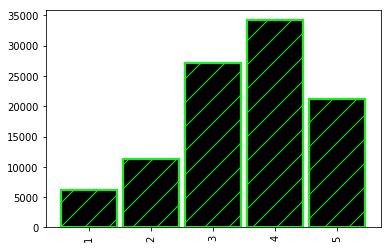

In [14]:
ratings.value_counts().sort_index().plot.bar(width=0.9,color='000000',edgecolor='#00FF00',linewidth=2,hatch='/',bottom = 0)

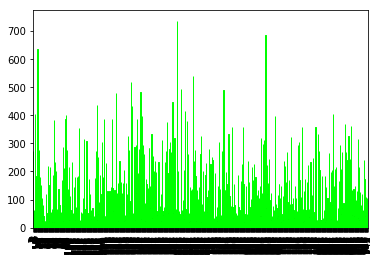

In [15]:
raw_data['user_id'].value_counts().sort_index().plot.bar(color='000000',edgecolor='#00FF00',hatch='/',bottom = 0)

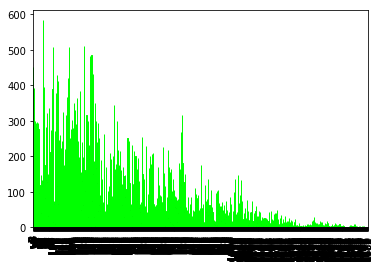

In [16]:
raw_data['item_id'].value_counts().sort_index().plot.bar(color='000000',edgecolor='#00FF00',hatch='/',bottom = 0)

<h1 style="color:red;">QUESTION 1: DATA ANALYSIS</h1>

**Describe the dataset. How many ratings are in the dataset? How would you describe the distribution of ratings? Is there anything else we should observe? Make sure the histogram is visible in the notebook.**

The dataset we imported has 100,000 ratings that are given in the form: user_id 	item_id 	rating 	timestamp. That are related each one to a User, Movie, Rating that the user gives to the movie and the timestamp of the rating.

The **histogram** shows that most of the ratings given are a 4 out of 5 with more than one third of the total ratings given.

**The number of ratings given per user** seems **disperse**, we have users that have rated over 700 movies and we have users that have rated only 20 movies.

Also the **rating of the movies** movies are disperse, since we have movies rated only once and we have movies that have been rated more than 400 times

# Model 1: Random

In [17]:
# Create model using NormalPredictor() class
model_random = NormalPredictor()

In [18]:
# Train on data using cross-validation with k=5 folds, measuring the RMSE
# See the cross_validate function that we have imported above
# http://surprise.readthedocs.io/en/stable/model_selection.html#surprise.model_selection.validation.cross_validate
model_random_results = cross_validate(model_random, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm NormalPredictor on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.5237  1.5102  1.5150  1.5077  1.5137  1.5141  0.0055  
Fit time          0.92    0.90    1.05    0.93    0.90    0.94    0.05    
Test time         1.68    1.26    1.19    1.31    1.18    1.33    0.19    


In [19]:
sum(model_random_results['test_rmse'])/len(model_random_results['test_rmse'])

1.5140673236869597

# Model 2: User-Based Collaborative Filtering

In [20]:
# Create model using KNNBasic() class
# See the sim_options parameter to determine the user/item similarity calculation of the model
# http://surprise.readthedocs.io/en/stable/prediction_algorithms.html#similarity-measures-configuration
model_user = KNNBasic(sim_options={'user_based': True})

In [21]:
# Train using same cross validation code as above
model_user_results = cross_validate(model_user, data, measures=['RMSE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9781  0.9832  0.9795  0.9818  0.9739  0.9793  0.0032  
Fit time          3.26    3.15    3.22    3.28    3.11    3.20    0.07    
Test time         29.45   28.53   26.79   28.26   28.02   28.21   0.86    


In [22]:
sum(model_user_results['test_rmse'])/len(model_user_results['test_rmse'])

0.9793073104991794

# Model 3: Item-Based Collaborative Filtering

In [23]:
# Create model using KNNBasic() class
# Make sure you change the sim_options parameter from above
model_item = KNNBasic(sim_options={'user_based': False})

In [24]:
# Train using same cross validation code as above
model_item_results = cross_validate(model_item, data, measures=['RMSE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9763  0.9756  0.9768  0.9686  0.9732  0.9741  0.0030  
Fit time          5.25    5.39    4.10    3.88    5.09    4.74    0.62    
Test time         28.61   31.00   28.77   33.69   33.72   31.16   2.24    


In [25]:
sum(model_item_results['test_rmse'])/len(model_item_results['test_rmse'])

0.9740999442282998

<h1 style="color:red;">QUESTION 2: COLLABORATIVE FILTERING MODELS</h1>

**Compare the results from the user-user and item-item models. How do they compare to each other? How do they compare to our original "random" model? Can you provide any intuition as to why the results came out the way they did?**

The **user to user** and the **item to item** models performed significatively better than the **random** model; this happens because the random model does not take into consideration a very large portion of the information provided by the dataset, so it makes sense that the result of the random model performes far worse. Between the user-user and the item-item models, it is hard to tell which one is better because their  performance is good, and it doest not meaningfully change from one to the other.

We can see that the RMSE of the item to item approach is a little bit better then the user to user (RMSE is 0.9788 for the user to user model and 0.9751 for the item to item model), but it took a little more time to compute; so that can be an advantage for the user to user model. For a dataset that has even more data points, we can think that the item to item model would converge more, and we could even try doing the model offline, leaving outside our model some fresh data points. and with more data points, we can expect the behaviour of the user to user model to diverge thanks to the dinamic nature of people.

*Type your response here...*

# Model 4: Matrix Factorization

In [26]:
# Create model using SVD() class
model_matrix = SVD()

In [27]:
# Train using same cross validation code as above
model_matrix_results = cross_validate(model_matrix, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9393  0.9463  0.9289  0.9340  0.9346  0.9366  0.0059  
Fit time          38.91   40.74   42.83   41.16   40.49   40.83   1.26    
Test time         1.65    2.64    1.43    1.39    2.15    1.85    0.48    


In [28]:
sum(model_matrix_results['test_rmse'])/len(model_matrix_results['test_rmse'])

0.9366370553206149

<h1 style="color:red;">QUESTION 3: MATRIX FACTORIZATION MODEL</h1>

**The matrix factorization model is different from the collaborative filtering models. Briefly describe this difference. Also, compare the RMSE again. Does it improve? Can you offer any reasoning as to why that might be?**

The matrix factorization model's performance is even better than the user to user or the item to item, but it takes more time to converge. Basically how the matrix factoriztion model works, is that it factors a Matrix A into simpler versions and applies stochastic gradient descent there to minimize the squared error. At the moment of factorization, our model works with noise but also in higher dimensions; this process helps you find latent features within the data, and the gradient descent helps to reduce the error input by the noise added in the factorization process.

# Precision and Recall @ `k`

We now want to compute the precision and recall for 2 values of `k`: 5 and 10. We have provided some code here to help you do that.

First, we define a function that takes in some predictions, a value of `k` and a threshold parameter. This code is adapted from [here](http://surprise.readthedocs.io/en/stable/FAQ.html?highlight=precision#how-to-compute-precision-k-and-recall-k).

In [29]:
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = dict()
    for uid, _, true_r, est, _ in predictions:
        current = user_est_true.get(uid, list())
        current.append((est, true_r))
        user_est_true[uid] = current

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls

In [30]:
# Make list of k values
K = [5, 10]

# Make list of models
models = [model_random, model_user, model_item, model_matrix]

# Create k-fold cross validation object
kf = KFold(n_splits=5)
metrics = {}
indicators = {}
for k in K:
    print('*********************** Iterating with k ='+str(k) + '****************************')
    counter = 1
    metrics[k]={}
    indicators[k]={}
    for model in models:
        print('************************* Model number '+str(counter))
        # Run folder and take average
        p = []
        r = []
        metrics[k][counter]={}
        indicators[k][counter]={}
        for trainset, testset in kf.split(data):
            model.fit(trainset)
            predictions = model.test(testset, verbose=False)
            precisions, recalls = precision_recall_at_k(predictions, k=k, threshold=3.5)

            # Precision and recall can then be averaged over all users
            p.append(sum(prec for prec in precisions.values()) / len(precisions))
            r.append(sum(rec for rec in recalls.values()) / len(recalls))
        
        print('>>> precision:', round(sum(p) / len(p), 3))
        print('>>> reccall  :', round(sum(r) / len(r), 3))
        metrics[k][counter]['p']=p
        metrics[k][counter]['r']=r
        indicators[k][counter]['p']=sum(p) / len(p)
        indicators[k][counter]['r']=sum(r) / len(r)
        counter = counter +1

*********************** Iterating with k =5****************************
************************* Model number 1
>>> precision: 0.58
>>> reccall  : 0.342
************************* Model number 2
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
>>> precision: 0.761
>>> reccall  : 0.457
************************* Model number 3
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity 

In [31]:
indicators['rmse']={}
indicators['rmse'][1]=sum(model_random_results['test_rmse'])/len(model_random_results['test_rmse'])
indicators['rmse'][2]=sum(model_user_results['test_rmse'])/len(model_user_results['test_rmse'])
indicators['rmse'][3]=sum(model_item_results['test_rmse'])/len(model_item_results['test_rmse'])
indicators['rmse'][4]=sum(model_matrix_results['test_rmse'])/len(model_matrix_results['test_rmse'])

In [32]:
indicators[5]

{1: {'p': 0.579717198403918, 'r': 0.3415732351421551},
 2: {'p': 0.7606185171082689, 'r': 0.4572157120554599},
 3: {'p': 0.8163739885926928, 'r': 0.389626312830023},
 4: {'p': 0.7840626017383905, 'r': 0.43243975914055977}}

In [33]:
indicators[10]

{1: {'p': 0.5946166317771169, 'r': 0.43599201876176147},
 2: {'p': 0.7362875239763655, 'r': 0.5917957758657505},
 3: {'p': 0.7932377113466316, 'r': 0.5346169868476462},
 4: {'p': 0.7536485904456933, 'r': 0.5613624970971106}}

In [34]:
indicators['rmse']

{1: 1.5140673236869597,
 2: 0.9793073104991794,
 3: 0.9740999442282998,
 4: 0.9366370553206149}

In [35]:
indicators['rmse'][1]

1.5140673236869597

In [36]:
def resultsTable():
    print('Overall ranking')

    print('\t\t\t P@5\t\tP@10\t\tR@5\t\tR@10\t\tRMSE')
    print('RandomModel \t\t'     
                          +str(round(indicators[5][1]['p'],3))
                          +'\t\t'
                          +str(round(indicators[10][1]['p'],3))
                          +'\t\t'
                          +str(round(indicators[10][1]['r'],3))
                          +'\t\t'
                          +str(round(indicators[10][1]['r'],3))
                          +'\t\t'
                          +str(round(indicators['rmse'][1],3))
         )
    print('User2User \t\t'
                          +str(round(indicators[5][2]['p'],3))
                          +'\t\t'
                          +str(round(indicators[10][2]['p'],3))
                          +'\t\t'
                          +str(round(indicators[10][2]['r'],3))
                          +'\t\t'
                          +str(round(indicators[10][2]['r'],3))
                          +'\t\t'
                          +str(round(indicators['rmse'][2],3))     
         )
    print('Item2Item \t\t'
                          +str(round(indicators[5][3]['p'],3))
                          +'\t\t'
                          +str(round(indicators[10][3]['p'],3))
                          +'\t\t'
                          +str(round(indicators[10][3]['r'],3))
                          +'\t\t'
                          +str(round(indicators[10][3]['r'],3))
                          +'\t\t'
                          +str(round(indicators['rmse'][3],3))
         )
    print('MatrixFact \t\t'
                          +str(round(indicators[5][4]['p'],3))
                          +'\t\t'
                          +str(round(indicators[10][4]['p'],3))
                          +'\t\t'
                          +str(round(indicators[10][4]['r'],3))
                          +'\t\t'
                          +str(round(indicators[10][4]['r'],3))
                          +'\t\t'
                          +str(round(indicators['rmse'][4],3))
         )

Next, we compute the precision and recall at `k` = 5 and 10 for each of our 4 models. We use 5-fold cross validation again to average the results across the entire dataseat.

Please note that this will take some time to compute.

<h1 style="color:red;">QUESTION 4: PRECISION/RECALL</h1>

**Compute the precision and recall, for each of the 4 models, at `k` = 5 and 10. This is 2 x 2 x 4 = 16 numerical values. Do you note anything interesting about these values? Anything differerent from the RMSE values you computed above?**

Some code is required for this question.

In [37]:
# Use the function above to compute the 16 numerical values requested above
# See the test() function to get the predictions input to the function
# http://surprise.readthedocs.io/en/stable/algobase.html#surprise.prediction_algorithms.algo_base.AlgoBase.test


#*********************************** Please not ethat the code is above the question, here I just want to show a table that
#*********************************** I built to see the results more clearly.

resultsTable()


Overall ranking
			 P@5		P@10		R@5		R@10		RMSE
RandomModel 		0.58		0.595		0.436		0.436		1.514
User2User 		0.761		0.736		0.592		0.592		0.979
Item2Item 		0.816		0.793		0.535		0.535		0.974
MatrixFact 		0.784		0.754		0.561		0.561		0.937


As it is expected, the  **Random Model has the worst performance of all the models** reviewed in the case study. This model has the highest RMSE, and the lowest of the Precision and Recall metrics, this can be easily explained because of the simplicity of the model.

The best performing model for the RMSE metric is the Matrix Fcatorization Model, and this can also be easily explained since the Dreadient Descent algorithm takes into consideration the optimization of the squared error, affecting directly the RMSE value.

If we take into **consideration** the **precision and the recall**, the **item to item** model is the one that shows the **best** results for both cases.

As I mentioned in the answer number 2, the User to User model tends to diverge in large ammounts of data, as the behaviour of the other collaborative method tends to do the opposite, so it makes sense that the User to User model has a worse performance than the Item to Item model.

Apparently , collaborative filtering methods have a better performance on the precision and recall metrics since it takes into consideration the affinity between users or items, that are relationships that do not have much weight in the Matrix Factorization Model.

#  Top-`n` Predictions

Finally, we can see what some of the actual movie ratings are for particular users, as outputs of our model.

Again, we define a helpful function.

In [38]:
def get_top_n(predictions, n=5):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = dict()
    for uid, iid, true_r, est, _ in predictions:
        current = top_n.get(uid, [])
        current.append((iid, est))
        top_n[uid] = current

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [39]:
trainset = data.build_full_trainset()
testset = trainset.build_anti_testset()

In [41]:
counter = 1
tops = []
for model in models:
    print('******************** Working wiht the model number' + str(counter))
    model.fit(trainset)
    predictions = model.test(testset)
    top_n = get_top_n(predictions, n=5)
    tops.append(top_n)
    # Print the first one
    user = list(top_n.keys())[0]
    print(f'model: {model}, {user}: {top_n[user]}')
    counter = counter + 1

******************** Working wiht the model number1
model: <surprise.prediction_algorithms.random_pred.NormalPredictor object at 0x7f749cbb2470>, 196: [('193', 5), ('88', 5), ('564', 5), ('196', 5), ('143', 5)]
******************** Working wiht the model number2
Computing the msd similarity matrix...
Done computing similarity matrix.
model: <surprise.prediction_algorithms.knns.KNNBasic object at 0x7f74a4fc63c8>, 196: [('1189', 5), ('1500', 5), ('814', 5), ('1536', 5), ('1599', 5)]
******************** Working wiht the model number3
Computing the msd similarity matrix...
Done computing similarity matrix.
model: <surprise.prediction_algorithms.knns.KNNBasic object at 0x7f7472f26a20>, 196: [('1414', 4.666666666666667), ('1309', 4.5), ('1310', 4.5), ('1675', 4.333333333333333), ('1676', 4.3076923076923075)]
******************** Working wiht the model number4
model: <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7f749cfbae80>, 196: [('64', 4.64979831464442), ('187', 4.

In [62]:
predictions

[Prediction(uid='196', iid='302', r_ui=3.52986, est=4.069748875208385, details={'was_impossible': False}),
 Prediction(uid='196', iid='377', r_ui=3.52986, est=2.88305076624053, details={'was_impossible': False}),
 Prediction(uid='196', iid='51', r_ui=3.52986, est=3.5172023369955863, details={'was_impossible': False}),
 Prediction(uid='196', iid='346', r_ui=3.52986, est=3.577496694137707, details={'was_impossible': False}),
 Prediction(uid='196', iid='474', r_ui=3.52986, est=4.242551745345893, details={'was_impossible': False}),
 Prediction(uid='196', iid='265', r_ui=3.52986, est=3.932841967870687, details={'was_impossible': False}),
 Prediction(uid='196', iid='465', r_ui=3.52986, est=3.7101513561592085, details={'was_impossible': False}),
 Prediction(uid='196', iid='451', r_ui=3.52986, est=3.5118759649036044, details={'was_impossible': False}),
 Prediction(uid='196', iid='86', r_ui=3.52986, est=3.8055014533695215, details={'was_impossible': False}),
 Prediction(uid='196', iid='1014', r

In [56]:
tops[0]

{'1': [('465', 5), ('1014', 5), ('274', 5), ('1184', 5), ('768', 5)],
 '10': [('265', 5), ('118', 5), ('88', 5), ('796', 5), ('384', 5)],
 '100': [('40', 5), ('387', 5), ('768', 5), ('88', 5), ('32', 5)],
 '101': [('377', 5), ('1042', 5), ('144', 5), ('234', 5), ('194', 5)],
 '102': [('40', 5), ('486', 5), ('603', 5), ('100', 5), ('423', 5)],
 '103': [('1014', 5), ('1184', 5), ('392', 5), ('796', 5), ('16', 5)],
 '104': [('40', 5), ('387', 5), ('486', 5), ('768', 5), ('1081', 5)],
 '105': [('1042', 5), ('768', 5), ('234', 5), ('564', 5), ('181', 5)],
 '106': [('242', 5), ('302', 5), ('451', 5), ('29', 5), ('392', 5)],
 '107': [('1014', 5), ('1042', 5), ('603', 5), ('304', 5), ('564', 5)],
 '108': [('86', 5), ('785', 5), ('144', 5), ('118', 5), ('95', 5)],
 '109': [('86', 5), ('486', 5), ('194', 5), ('143', 5), ('496', 5)],
 '11': [('246', 5), ('1081', 5), ('1137', 5), ('4', 5), ('518', 5)],
 '110': [('242', 5), ('377', 5), ('51', 5), ('95', 5), ('768', 5)],
 '111': [('51', 5), ('265', 

In [57]:
tops[1]

{'1': [('1189', 5), ('814', 5), ('1536', 5), ('1293', 5), ('1599', 5)],
 '10': [('1189', 5), ('1500', 5), ('814', 5), ('1536', 5), ('1293', 5)],
 '100': [('1189', 5), ('814', 5), ('1536', 5), ('1293', 5), ('1599', 5)],
 '101': [('1189', 5), ('1500', 5), ('814', 5), ('1536', 5), ('1293', 5)],
 '102': [('1189', 5), ('1500', 5), ('814', 5), ('1536', 5), ('1293', 5)],
 '103': [('1189', 5), ('1500', 5), ('814', 5), ('1536', 5), ('1293', 5)],
 '104': [('1189', 5), ('1500', 5), ('814', 5), ('1536', 5), ('1293', 5)],
 '105': [('1189', 5), ('1500', 5), ('814', 5), ('1536', 5), ('1293', 5)],
 '106': [('1189', 5), ('1500', 5), ('814', 5), ('1536', 5), ('1293', 5)],
 '107': [('1189', 5), ('814', 5), ('1536', 5), ('1293', 5), ('1599', 5)],
 '108': [('1189', 5), ('1500', 5), ('814', 5), ('1536', 5), ('1293', 5)],
 '109': [('1189', 5), ('1500', 5), ('814', 5), ('1536', 5), ('1293', 5)],
 '11': [('1189', 5), ('1500', 5), ('814', 5), ('1536', 5), ('1293', 5)],
 '110': [('1189', 5), ('1500', 5), ('814',

In [58]:
tops[2]

{'1': [('1653', 4.632034632034633),
  ('302', 4.526835838674708),
  ('318', 4.457913843191098),
  ('1654', 4.450980392156863),
  ('657', 4.447115562953161)],
 '10': [('1463', 4.580645161290323),
  ('318', 4.5338523112063625),
  ('427', 4.52587046269571),
  ('644', 4.507985137501474),
  ('659', 4.499941768171437)],
 '100': [('1619', 4.4),
  ('1556', 4.136019146390107),
  ('1674', 4.0),
  ('1582', 3.9508196721311473),
  ('1561', 3.9508196721311473)],
 '101': [('1430', 4.142642642642643),
  ('1236', 4.0),
  ('1582', 4.0),
  ('1561', 4.0),
  ('1565', 4.0)],
 '102': [('135', 3.129593166393852),
  ('196', 3.1165843883786346),
  ('119', 3.1141552511415513),
  ('1599', 3.101626016260162),
  ('22', 3.099307144026974)],
 '103': [('1467', 4.211092213902882),
  ('1533', 4.08695652173913),
  ('1372', 4.054794520547945),
  ('1026', 4.0353260869565215),
  ('1304', 4.028431320885662)],
 '104': [('1582', 3.703296703296703),
  ('1561', 3.703296703296703),
  ('1565', 3.703296703296703),
  ('1563', 3.7032

In [59]:
tops[3]

{'1': [('408', 5),
  ('302', 4.884087936408955),
  ('603', 4.81222764174705),
  ('474', 4.754234587268923),
  ('479', 4.662511458001777)],
 '10': [('318', 4.902809937784212),
  ('169', 4.791537845383105),
  ('408', 4.7544013281073685),
  ('272', 4.745454423848379),
  ('515', 4.739469636839107)],
 '100': [('408', 4.4416456935837),
  ('169', 4.3524566752914025),
  ('64', 4.330321473763556),
  ('318', 4.22546796103074),
  ('12', 4.193913657761325)],
 '101': [('12', 4.193548638012237),
  ('318', 4.191936712332517),
  ('483', 4.126287445217429),
  ('192', 4.095730915825076),
  ('64', 4.091564932526087)],
 '102': [('408', 3.8371407754897273),
  ('169', 3.821440795471094),
  ('114', 3.683235743568425),
  ('64', 3.589227838062852),
  ('251', 3.5793655298226454)],
 '103': [('408', 4.564198385710457),
  ('169', 4.540615899238291),
  ('83', 4.512517358058609),
  ('963', 4.462028971033453),
  ('318', 4.373594119924957)],
 '104': [('318', 4.097596224164643),
  ('427', 3.9555069889411976),
  ('172',

Then, we call this function on each of our models, first training on **all** the data we have available, then predicting on the remaining, missing data. We use `n`=5 here, but you can pick any reasonable value of `n` you would like.

This may take some time to compute, so be patient.

Hint: Use [`**Dataset.build_full_trainset**`](http://surprise.readthedocs.io/en/stable/dataset.html#surprise.dataset.DatasetAutoFolds.build_full_trainset) to get the full trainset from the data. Then call [`**Trainset.build_anti_testset**`](http://surprise.readthedocs.io/en/stable/trainset.html#surprise.Trainset.build_anti_testset) to get the testset out. Finally, `fit` on the trainset, `test` on the testset, then pass that result to our `get_top_n` function.

<h1 style="color:red;">QUESTION 5: TOP N PREDICTIONS</h1>

**Do the top n predictions that you received make sense? What is the rating value (1-5) of these predictions? How could you use these predictions in the real-world if you were trying to build a generic content recommender system for a company?**

Some code is required for this question.

In [ ]:
# Use the function and hints above to give the top-n predictions for a given user, for a reasonable value of n

The top predictions make sense, since they are rated very close to 5 for each one of the models. This data could be used in a **generic recommender system** to make suggestions to each user, giving them the top rated items calculated. It would be a metter of testing which model gives better results, taking into consideration that it is probable that some models may need some changes depending on the performance of the system, and also the desired results for the company.

<hr>

Great job! Now, make sure you check out the **Conclusion** section of the [instruction manual](https://courses.edx.org/asset-v1:MITxPRO+DSx+2T2018+type@asset+block@4.1_instruction_manual.html) to wrap up this case study properly.